<a href="https://colab.research.google.com/github/glauciodrumond/Data_Science_Projects/blob/master/Airbnb_Data_Analysis__Hawaii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img alt="Analisando Airbnb" width="100%" src="https://3npro2k2jyx3gj3xd33s373n-wpengine.netdna-ssl.com/wp-content/uploads/2019/09/Hawaii2020.jpg"></center>

# Airbnb Data Analysis - Hawaii

Hawaii is a state of the United States of America. It is the only state located in the Pacific Ocean and the only state composed entirely of islands.

Hawaiʻi's diverse natural scenery, warm tropical climate, the abundance of public beaches, oceanic surroundings, and active volcanoes make it a popular destination for tourists, surfers, biologists, and volcanologists. Because of its central location in the Pacific and 19th-century labor migration, Hawaii's culture is strongly influenced by North American and East Asian cultures, in addition to its indigenous Hawaiian culture.

[Airbnb](https://www.airbnb.com.br/)  is already considered to be the **largest hotel company today**. Oh, the detail is: **it does not have any hotel**!

Connecting people around the world who want to travel and hosts who want to rent their propertiespractically and easily, Airbnb 
provides an innovative platform to make this hosting alternative.


At the end of 2018, the Startup founded 10 years ago, had already **hosted more than 300 million** people around the world, challenging traditional hotel chains.


One of Airbnb's initiatives is to provide website data for some of the world's major cities. Through the webpage [Inside Airbnb](http://insideairbnb.com/get-the-data.html), 
it is possible to download a large amount of data to develop *Data Science* projects and solutions.

<center><img alt="Analisando Airbnb" width="30%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>


**In this *notebook*, we will analyze the data relating to the city of Hawaii, and see what insights can be extracted from raw data.**

#Getting the Data
All data used here was an extract from [Inside Airbnb](http://insideairbnb.com/get-the-data.html)
For initial analysis exploratory, it will only download the archive:

* `listings.csv` - Summary information and metrics for listings in Rio de Janeiro (good for visualizations)

In [0]:
#importing packs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#getting the data from archive listings.csv
data = pd.read_csv ('http://data.insideairbnb.com/united-states/hi/hawaii/2019-12-04/visualisations/listings.csv')

#Data Analysis
This step aims to create an initial situational awareness and allow an understanding of how the data is structured.

Before starting any analysis, let's check the face of our dataset, analyzing the first 5 entries.**Dictionary of variables**

* `id` - number generated to identify the property
* `name` - advertised property name
* `host_id` - property owner (host) id number
* `host_name` - 
* `neighbourhood_group` - 
* `neighbourhood` -
* `latitude` - latitude coordinate of the property
* `longitude` - longitude coordinate of the property
* `room_type` - informs the type of room that is offered
* `price` - price to rent the property
* `minimum_nights` - minimum number of nights to book
* `number_of_reviews` - number of reviews the property has
* `last_review` - date of last review
* `reviews_per_month` - number of reviews per month
* `calculated_host_listings_count` - number of properties from the same host
* `availability_365` - number of days of availability within 365 days

Before starting any analysis, let's check the face of our *dataset*, analyzing the first 5 entries.

In [0]:
#shows the variables and firt 5 entries
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,5065,MAUKA BB,7257,Wayne,Hawaii,Hamakua,20.04095,-155.43251,Entire home/apt,85,2,37,2019-08-19,0.45,2,359
1,5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,Hawaii,South Kohala,20.02621,-155.70145,Entire home/apt,110,2,9,2019-10-20,0.09,5,251
2,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,Hawaii,South Kona,19.43119,-155.88079,Entire home/apt,92,5,162,2019-11-19,1.36,3,282
3,5389,Keauhou Villa,7878,Edward,Hawaii,North Kona,19.56413,-155.96347,Entire home/apt,299,6,17,2019-11-21,0.23,3,217
4,5390,STAY AT PRINCE KUHIO!,7887,Todd,Kauai,Koloa-Poipu,21.88305,-159.47372,Entire home/apt,92,3,130,2019-11-18,1.01,1,170


## Q1. How many attributes(variables) and how many entries does our set has? What is the type of the variable?

Let's go ahead and identify the number of entries that our dataset has and see the types of each column.

This dataset we downloaded is the "short" version of Airbnb. On the same page, we downloaded the file listings.csv. There is a more complete version with 35847 entries and 106 variables (listings.csv.gz).

In [0]:
#Indetify the data volume 
print("Variables:\t {}".format(data.shape[1]))
print("Entries:\t {}\n".format(data.shape[0]))

display(data.dtypes)

Variables:	 16
Entries:	 23745



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

##Q2. What is the percentage of missing values ​​in the dataset?

The quality of a dataset is directly related to the number of missing values. It is important to understand early on whether these null values ​​are significant compared to the total entries.

*  You can see that the `revies_per_month` and `last_review` column has close to 23% of its missing values.
*  The variable `host_name` has approximately 1,2% of the null values.
*  The variable `name` has approximately 0.07% of the null values.




In [0]:
# sort the variables in descending order by their missing values
(data.isnull().sum() / data.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.229564
last_review                       0.229564
host_name                         0.011623
name                              0.000674
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

##Q3. What is the type of distribution of the variables?
To identify the distribution of the variables, I will plot the histogram.

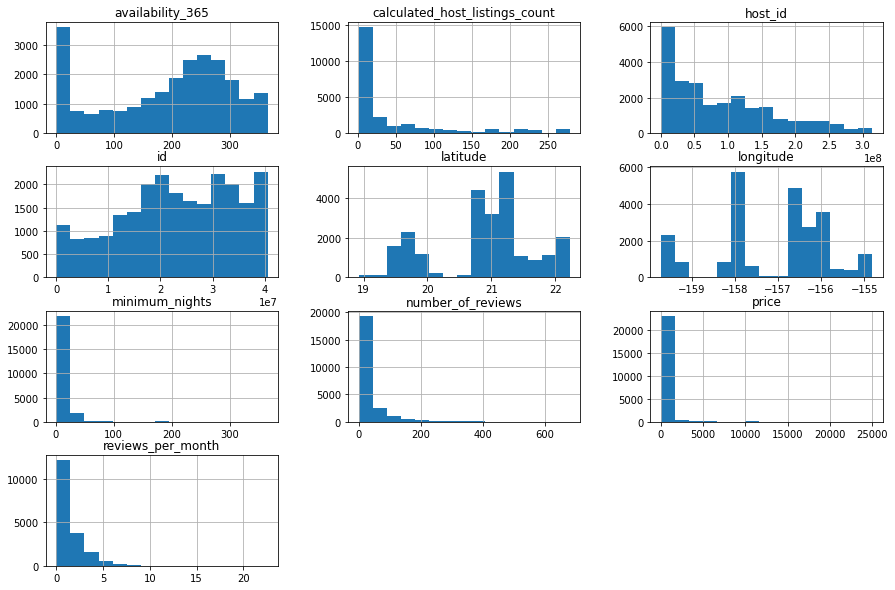

In [0]:
#Only numerical histogram will be plot
data.hist(bins=15, figsize=(15,10));

##Q4. Any outliers?

By distributing the histogram, it is possible to check for evidence of the presence of outliers. Take for example the `variables price`, `minimum_nights`, and `calculated_host_listings_count`.

The values ​​do not follow a distribution and distort the entire graphic representation. To confirm, there are two easy ways to help detect outliers. Are they:

* Statistical summary using the description () method
* Plot boxplots for a variable.




In [0]:
#verifie the statistical summary of numerical variables
data[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,23745.000000,23745.000000,23745.000000,18294.000000,23745.000000,23745.000000
mean,358.380291,5.385597,26.257907,1.398526,42.577090,190.334344
std,936.067258,11.176797,46.780110,1.523295,68.151171,110.226253
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,128.000000,1.000000,1.000000,0.300000,2.000000,102.000000
50%,199.000000,3.000000,7.000000,0.880000,7.000000,219.000000
75%,340.000000,5.000000,31.000000,2.020000,54.000000,275.000000
max,24999.000000,365.000000,680.000000,22.600000,279.000000,365.000000


Taking a look at the statistical summary above, we can confirm some hypotheses such as:


*   The variable price has 75% of the value below 340, but its max value is 24999. 
*   The variable minimum_nights has 75% of the value below 5, but its max value is 365.

### Boxplot: minimum_nights 



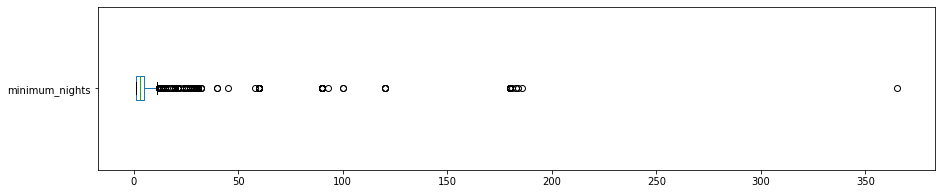

minimum_nights: values over 30:
173 entries
0.7286%


In [0]:
# minimum_nights
data.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

#Show amount of values over 30 days for minimum_nights 
print("minimum_nights: values over 30:")
print("{} entries".format(len(data[data.minimum_nights > 30])))
print("{:.4f}%".format((len(data[data.minimum_nights > 30]) / data.shape[0])*100))

### Boxplot: price

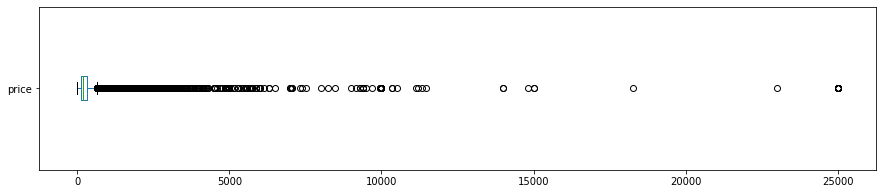


price: values over 1500
594 entries
2.5016%


In [0]:
# price
data.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# number of values over 1500 for price
print("\nprice: values over 1500")
print("{} entries".format(len(data[data.price > 1500])))
print("{:.4f}%".format((len(data[data.price > 1500]) / data.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

### Histogram without outliers
Since we identify outliers in the price and minimum_nights variables, let's clean up their DataFrame and plot a new histogram.



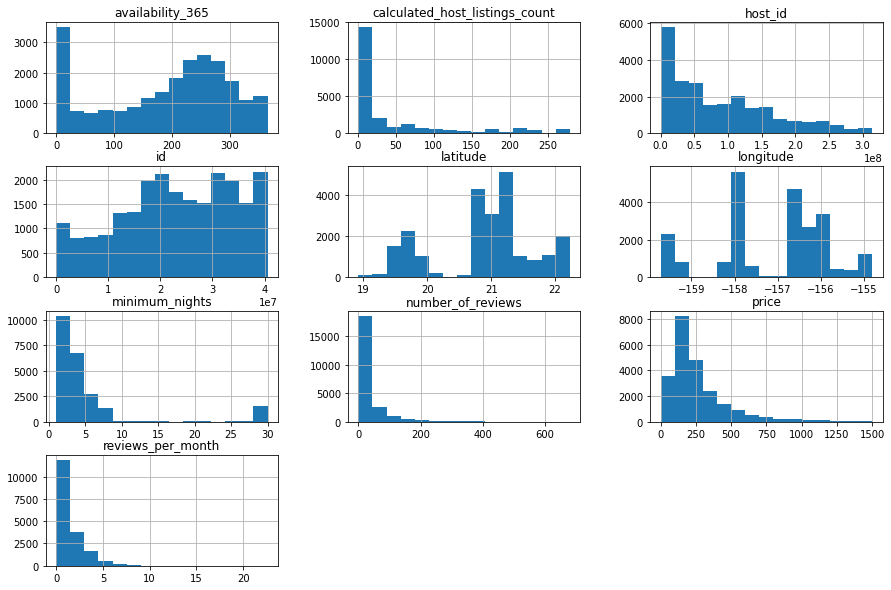

In [0]:
# remove *outliers* new DataFrame
df_clean = data.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plot  histogram for numerical variables
df_clean.hist(bins=15, figsize=(15,10));

## Q5. What is the correlation between the variables?
Correlation means that there is a relationship between two things.
In our context, we are looking for a relationship or similarity between two variables.

This relationship can be measured, and it is a function of the correlation coefficient to establish its intensity. To identify the correlations between the variables of interest, I will:


*   Create a correlation matrix
*   Generate a heatmap from this matrix, using the seaborn library



In [0]:
# Create a correlation matrix
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.028574,-0.261799,-0.303199,0.173272,0.025223
minimum_nights,-0.028574,1.000000,-0.054771,-0.110829,-0.077882,-0.028839
number_of_reviews,-0.261799,-0.054771,1.000000,0.635253,-0.256883,-0.051607
reviews_per_month,-0.303199,-0.110829,0.635253,1.000000,-0.288084,-0.105779
calculated_host_listings_count,0.173272,-0.077882,-0.256883,-0.288084,1.000000,0.175346
availability_365,0.025223,-0.028839,-0.051607,-0.105779,0.175346,1.000000


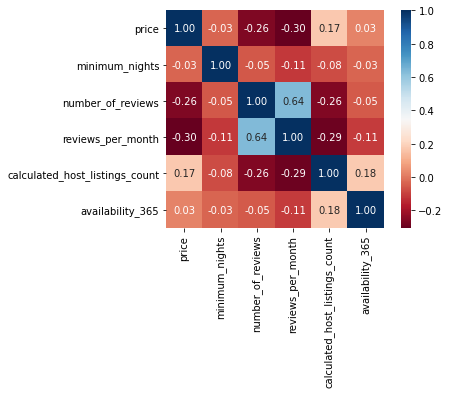

In [0]:
#create a heatmap
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

## Q6. What type of property is most rented on Airbnb?
The room_type variable column indicates the type of rental that is advertised on Airbnb. If you have already rented on the website, you know that there are options for apartments/entire houses, just renting a room or even sharing a room with other people.

Let's count the number of occurrences of each type of rental, using the value_counts () method. Italicized text

In [0]:
#shows the amount of which type of property available
df_clean.room_type.value_counts()

Entire home/apt    20258
Private room        2344
Hotel room           272
Shared room          108
Name: room_type, dtype: int64

In [0]:
# show the percentage of each type of property available
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.881472
Private room       0.101993
Hotel room         0.011835
Shared room        0.004699
Name: room_type, dtype: float64

## Q7. What is the most expensive location in Hawaii?

One way to check one variable against another is to use groupby(). In this case, we want to compare the neighborhoods based on the rental price.

In [0]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Lahaina              384.597175
Koloa-Poipu          373.877698
South Kohala         362.854359
Ewa                  346.132584
North Shore Kauai    313.751163
East Honolulu        295.777778
Kihei-Makena         294.747758
Koolaupoko           294.486679
Hana                 285.216216
Koolauloa            279.537383
Name: price, dtype: float64

As Latitudes and Longitudes are provided for properties, it is possible to plot each point. For this, it is considered x=longitude and y=latitude.

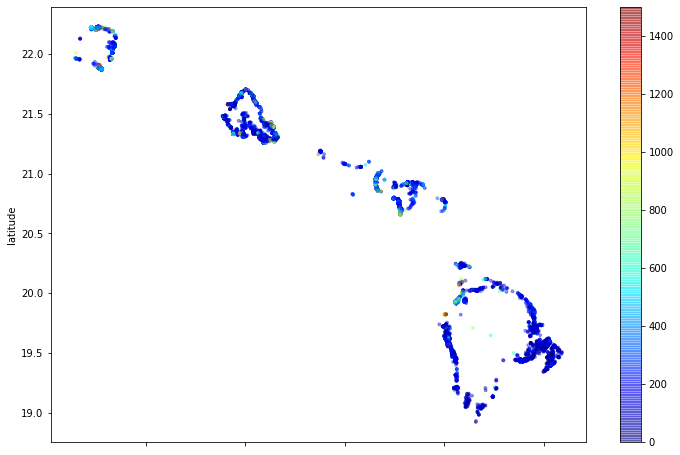

In [0]:
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

# Conclusion

This was only a superficial analysis was done in the Airbnb database, but it has already been noticed that there are outliers in some of the variables.

Entire home/apt is the most available type of property in Hawaii and it represents 88% of total properties available.

Lahaina has the most expensive average property rental prices while Koolauloa has the cheapest average price.

Remember that this dataset is a short version, ideal only for an initial approach. It is recommended that the complete data set with 106 available attributes be used in further exploratory analysis.

